In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
data = pd.read_csv("../../Data/Fertilizer Prediction.csv")
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None
       Temparature  Humidity    Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    66.121212
std       3.502304   5.840331  11.271568  11.599693   5.814667    28.658180
min      25.000000  50.000000  25.000000   4

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,21,Urea


In [10]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10/26/2026'], dtype=object)

In [11]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts', 'L'],
      dtype=object)

In [12]:
def plot_histogram(nutrient,data,measurement="kg/ha"):
    plt.xlabel(f"{nutrient} Ratio {measurement}")
    plt.ylabel(f"Number of Data Points")
    plt.title(f"{nutrient} Histogram")
    plt.hist(data)
    plt.savefig(f"output/plots/Fertilizer/{nutrient}FertilizerHistogram.png")
    plt.show()

def plot_crop_vs_nutrient(nutrient,column,measurement="kg/ha"):
    plt.figure(figsize=(10, 6))
    for crop, group in data.groupby('Fertilizer Name'):
        plt.scatter(group[column], group['Fertilizer Name'], label=crop)

        # Set labels and title
    plt.xlabel(f'{nutrient} Values measurement')
    plt.ylabel('Fertilizer')
    plt.title(f'{nutrient} Values vs Feetilizer')
    plt.legend()
    plt.savefig(f"output/plots/Fertilizer/{nutrient}ValuesvsFertilizerscatter.png")

    # Show plot
    plt.show()

labels = data["Fertilizer Name"].unique()
def plot_x_vs_label(feature,nutrient,measurement="kg/ha"):
    labels_cat = []
    for label in labels:
        labels_cat.append(data[data["Fertilizer Name"]==label][feature])
    fig = plt.figure(figsize=(25,6))
    plt.title(f"{nutrient} vs Fertilizer")
    plt.ylabel(f"{measurement}")
    plt.xticks([i for i in range(1,len(data["Fertilizer Name"].unique())+1)],data["Fertilizer Name"].unique())
    plt.violinplot(labels_cat)
    plt.savefig(f"output/plots/Fertilizer/{nutrient}ValuesvsFeritilizerviolin.png")

    # Show plot
    plt.show()
    

In [13]:
labels = data["Fertilizer Name"].unique()
labels

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10/26/2026'], dtype=object)

In [14]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [15]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts', 'L'],
      dtype=object)

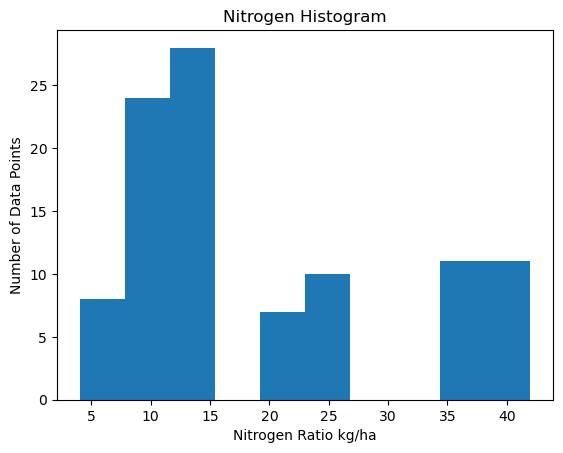

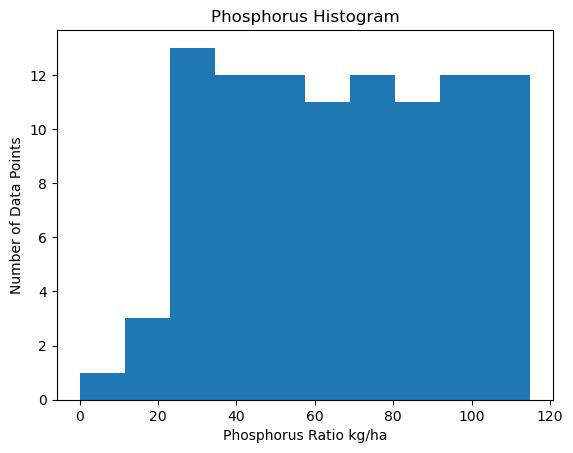

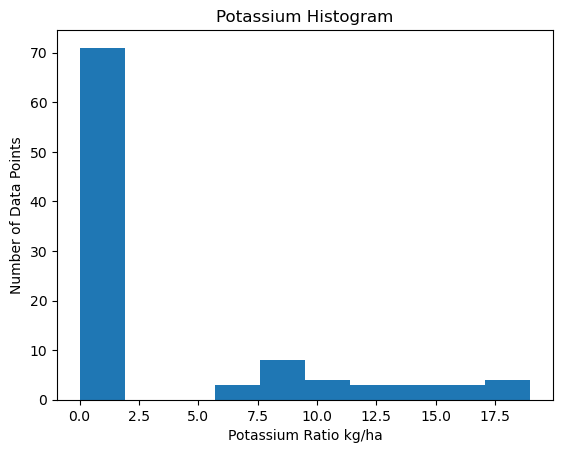

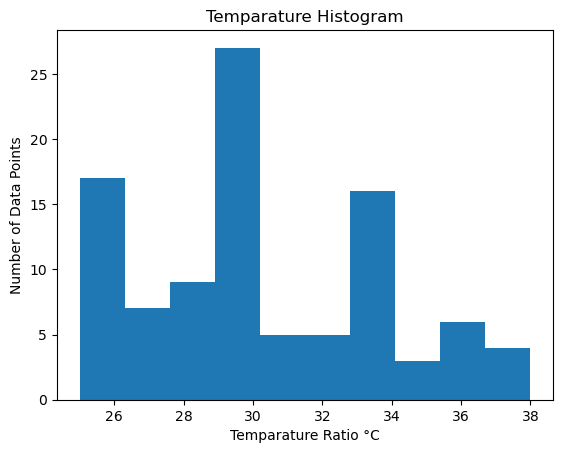

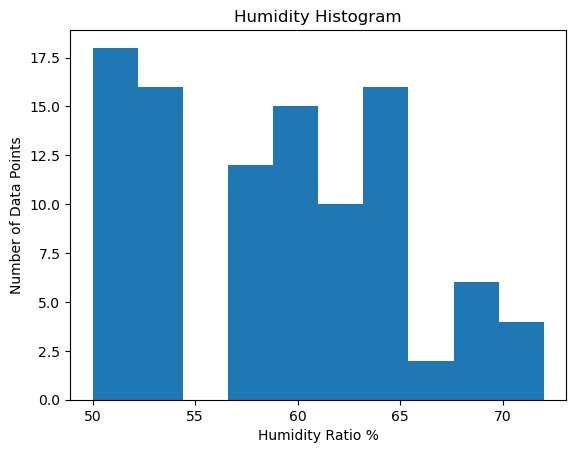

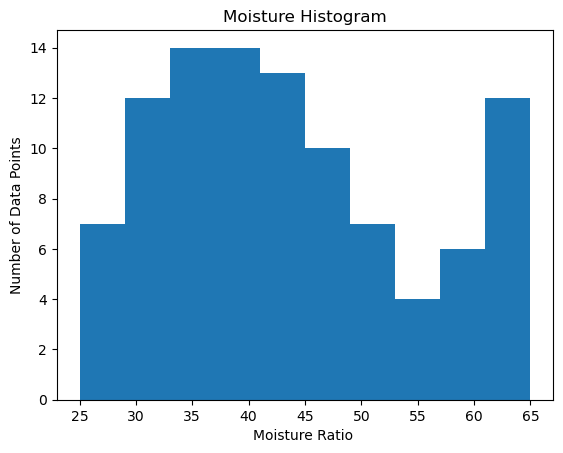

In [16]:
plot_histogram("Nitrogen",data["Nitrogen"])
plot_histogram("Phosphorus",data["Phosphorous"])
plot_histogram("Potassium",data["Potassium"])
plot_histogram("Temparature",data["Temparature"],"°C")
plot_histogram("Humidity",data["Humidity "],"%")
plot_histogram("Moisture",data["Moisture"],"")
# plot_histogram("Rainfall",data["rainfall"],"mm")


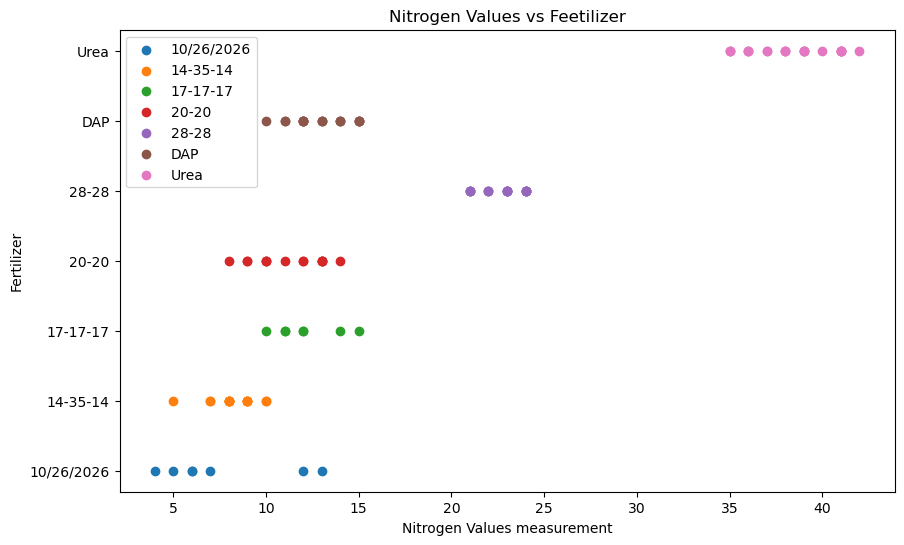

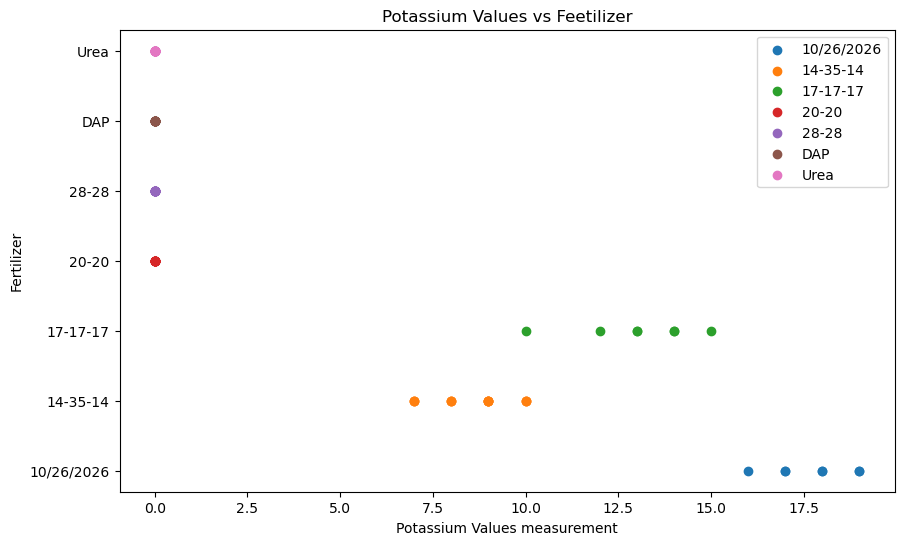

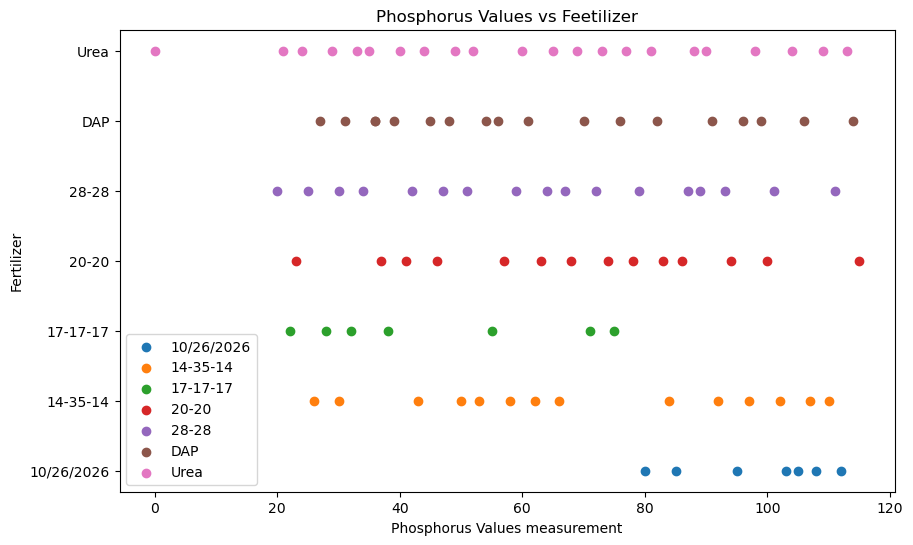

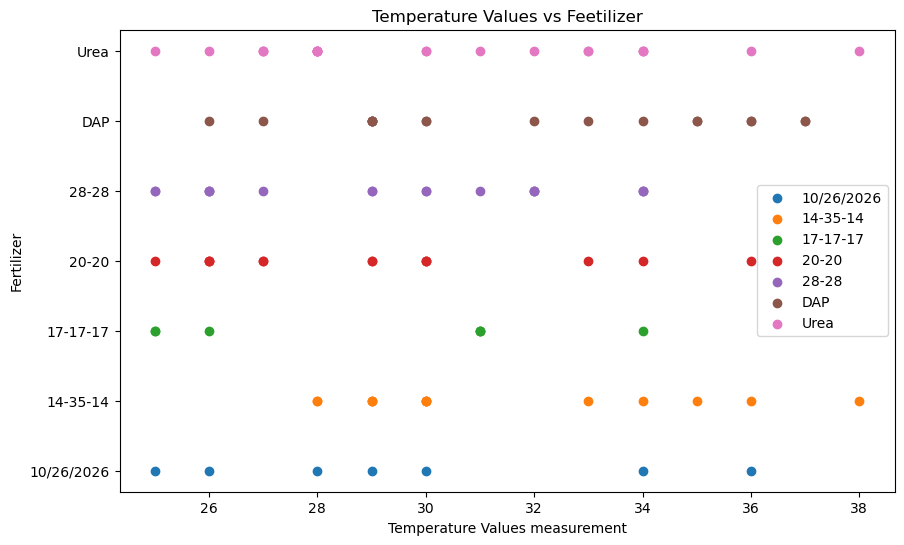

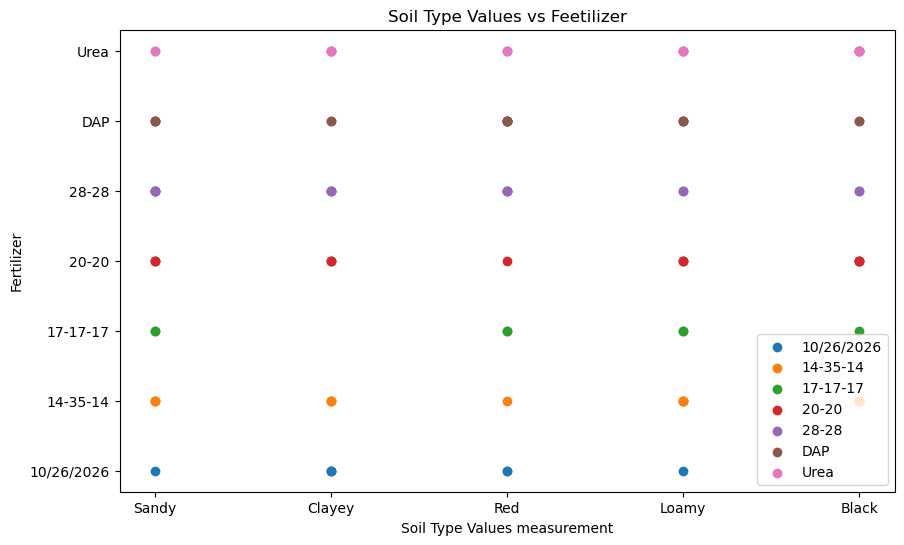

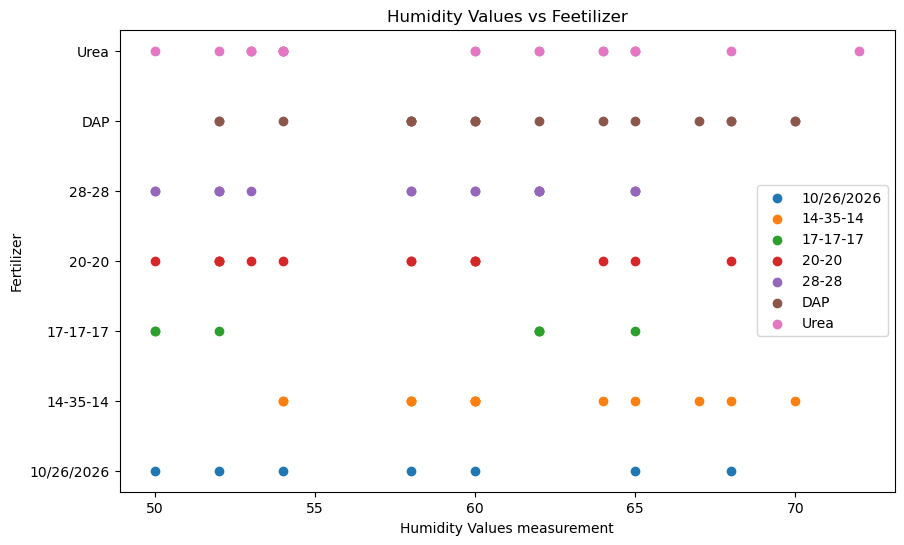

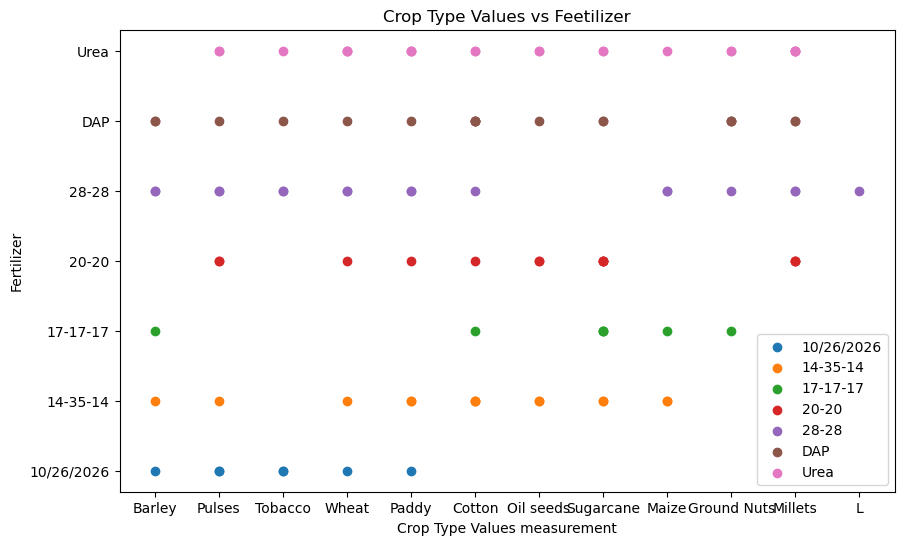

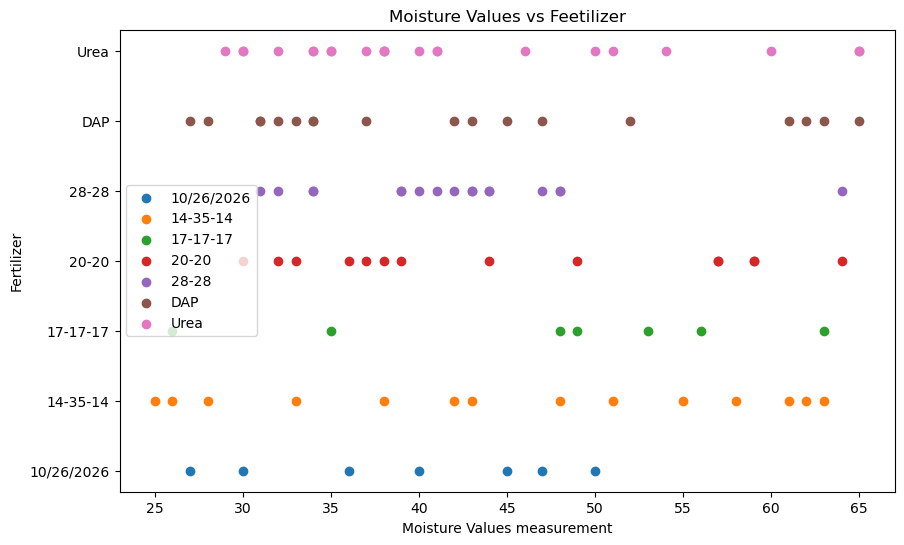

In [7]:
plot_crop_vs_nutrient("Nitrogen","Nitrogen","kg/ha")
plot_crop_vs_nutrient("Potassium","Potassium","kg/ha ")
plot_crop_vs_nutrient("Phosphorus","Phosphorous","kg/ha")
plot_crop_vs_nutrient("Temperature","Temparature","°c")
plot_crop_vs_nutrient("Soil Type","Soil Type","")
plot_crop_vs_nutrient("Humidity","Humidity ","%")
plot_crop_vs_nutrient("Crop Type","Crop Type","")
plot_crop_vs_nutrient("Moisture","Moisture","")

<AxesSubplot:>

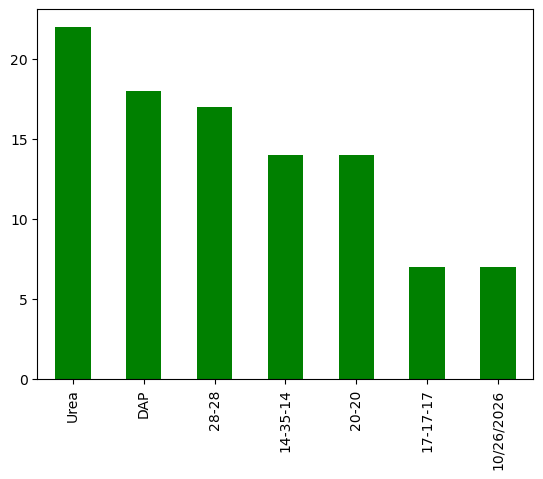

In [17]:
data['Fertilizer Name'].value_counts().plot(kind='bar', color='green')

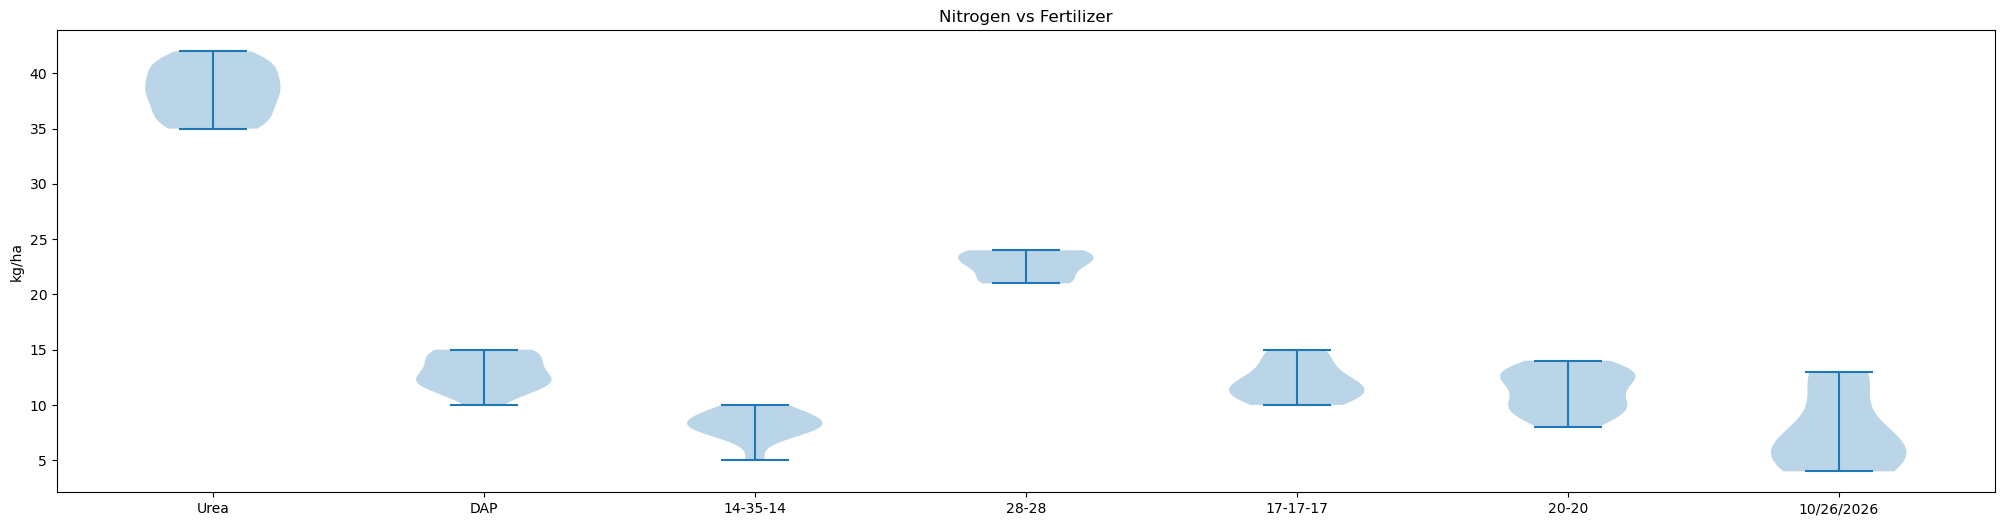

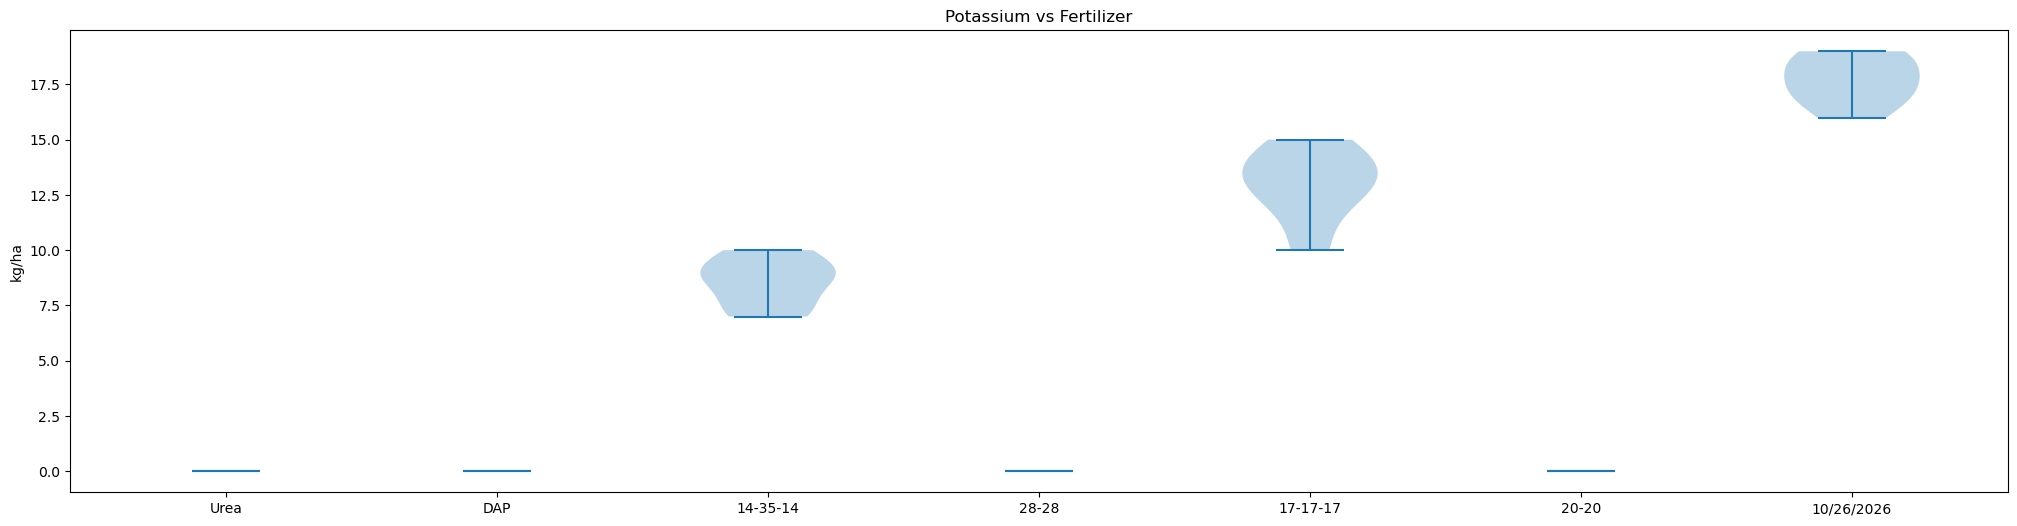

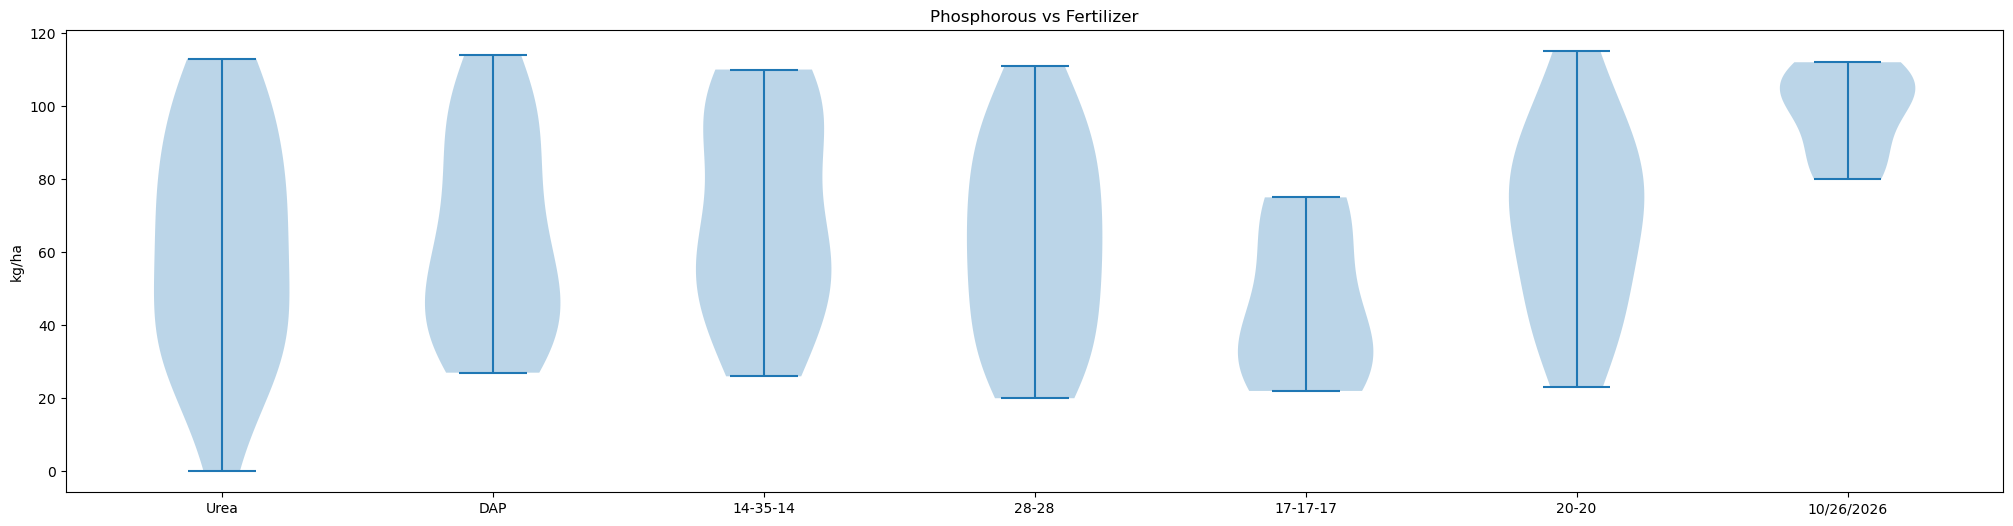

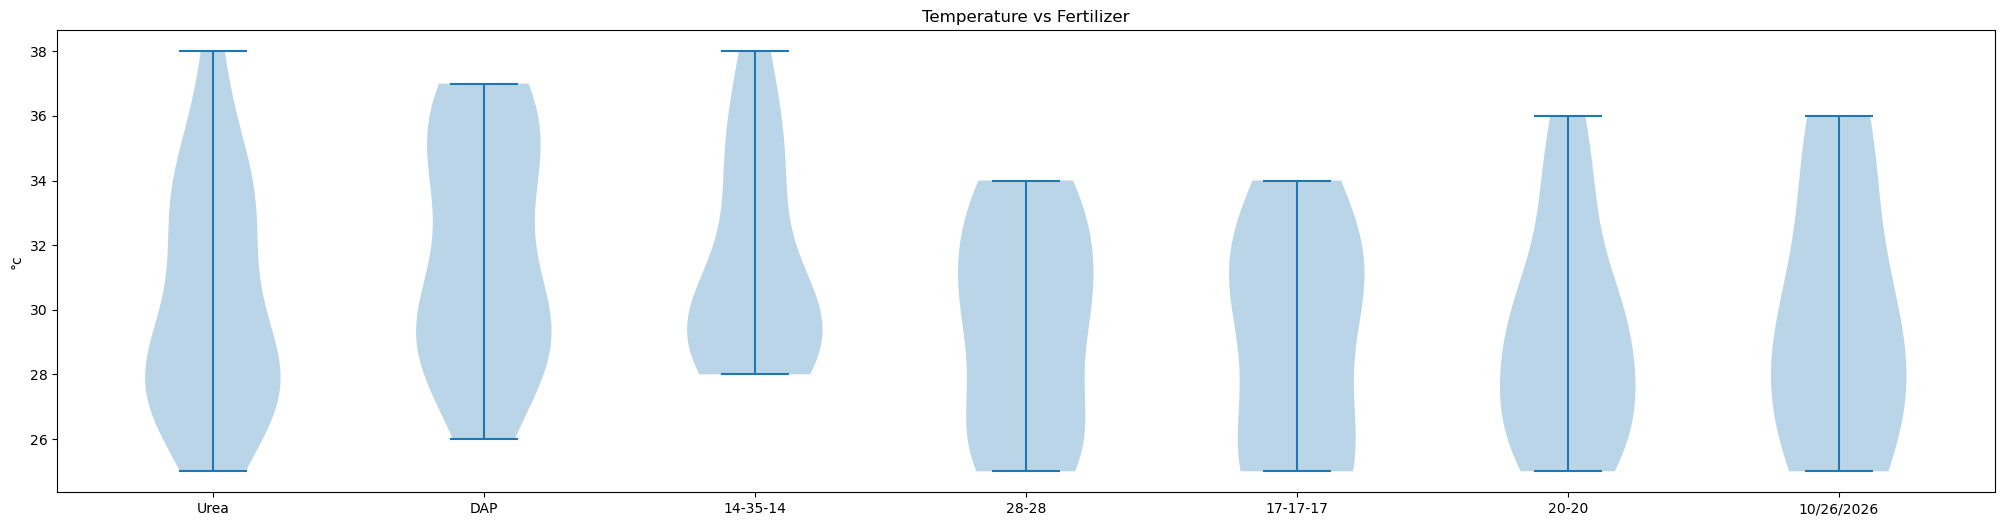

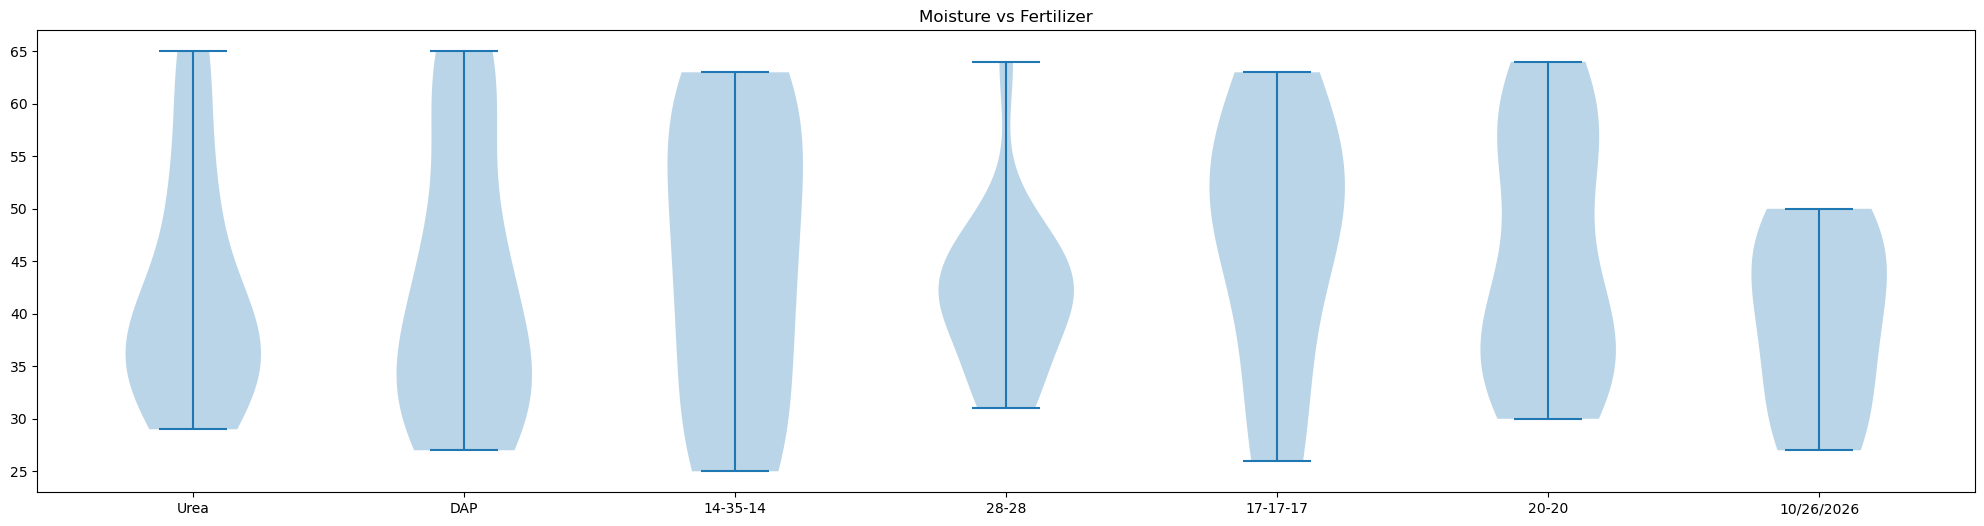

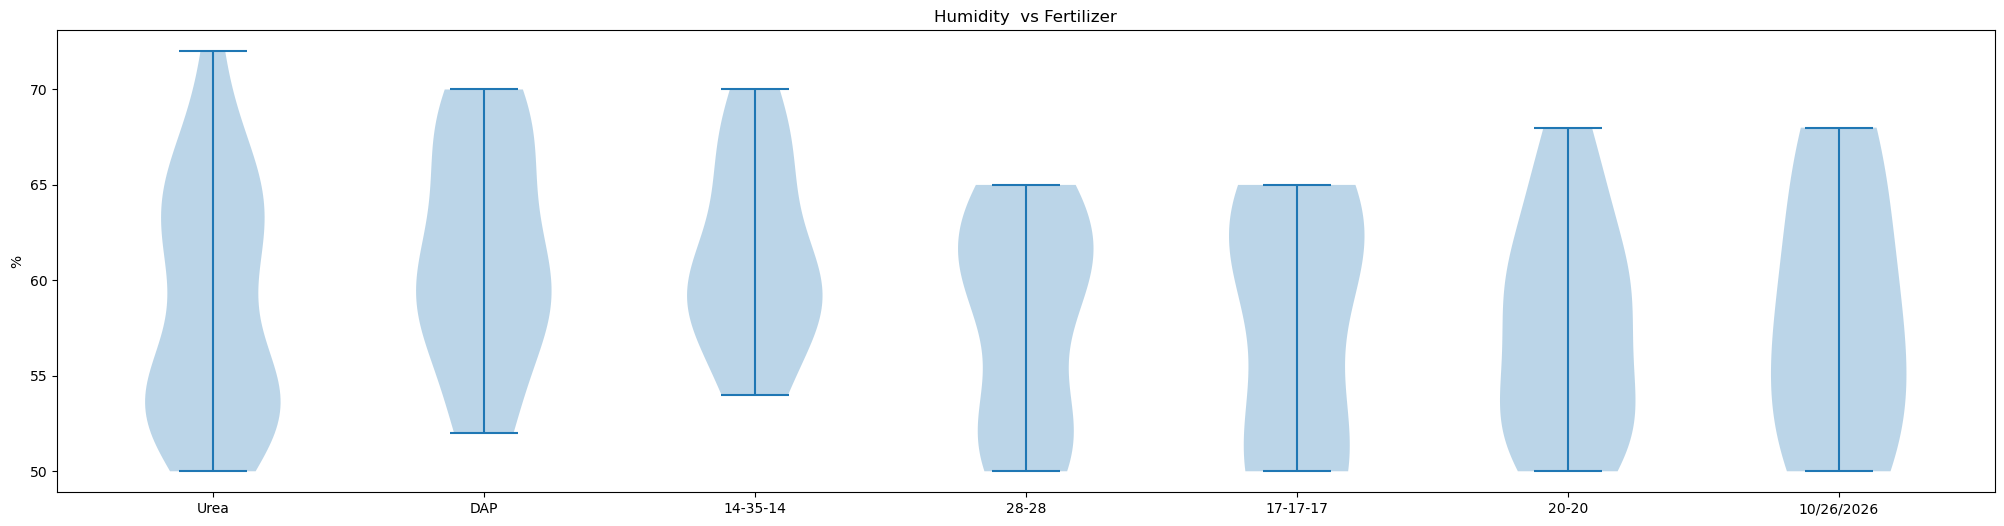

In [9]:
plot_x_vs_label("Nitrogen","Nitrogen")
plot_x_vs_label("Potassium","Potassium")
plot_x_vs_label("Phosphorous","Phosphorous")
plot_x_vs_label("Temparature","Temperature","°c")
plot_x_vs_label("Moisture","Moisture","")
plot_x_vs_label("Humidity ","Humidity ","%")
# plot_x_vs_label("Crop Type","Crop Type","")
# plot_x_vs_label("Soil Type","Soil Type","")

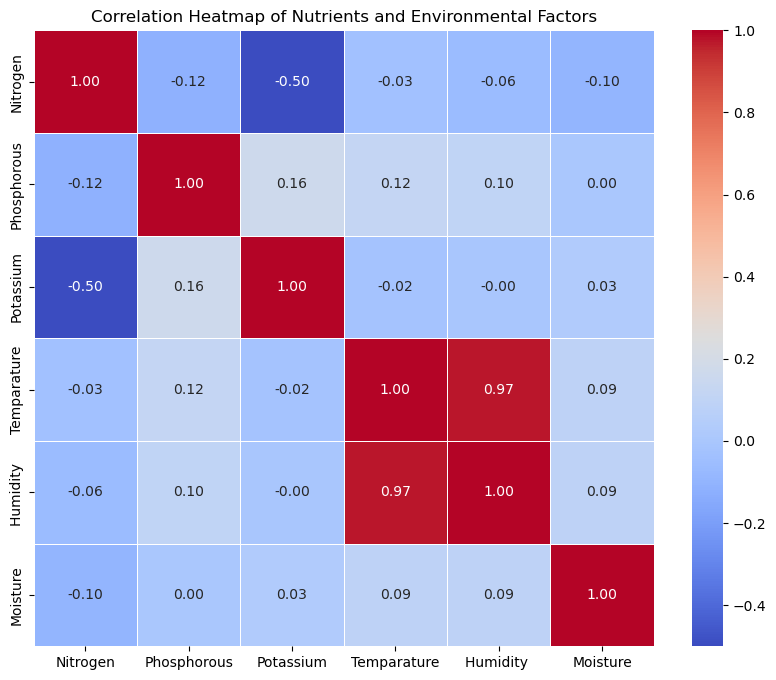

In [10]:
selected_columns = ['Nitrogen', 'Phosphorous', 'Potassium', 'Temparature', 'Humidity ', 'Moisture']
correlation_matrix = data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nutrients and Environmental Factors')
plt.savefig(f"output/plots/Fertilizer/FertilizerHeatMap.png")


plt.show()